In [125]:
#importing necessary libraries
import pandas as pd
import numpy as np

#Importing libraries for visulazation
import seaborn as sns 
import matplotlib.pyplot as plt

#importing libraries for statistical analysis
import statsmodels.api as sm
from scipy.stats import ttest_ind, f_oneway

#importing libraries for building linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

In [126]:
#Importing dataset
data = pd.read_csv('insurance.csv')
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [127]:
#Explore data 
data.shape

(1338, 7)

In [128]:
#Statistical analysis of dataset
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [130]:
#Checking for null values in dataset
data.isnull().sum() #there is no null values in data

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [131]:
#Create a database for statistical analysis
pd.DataFrame({'min' : [data.age.min(), data.bmi.min(), data.charges.min()], 'max' : 
[data.age.max(), data.bmi.max(), data.charges.max()], 'mean' : [data.age.mean(), data.bmi.mean(), 
data.charges.mean()]}, index=['age', 'bmi', 'charges'])

,min,max,mean
age,18.0000,64.00000,39.207025
bmi,15.9600,53.13000,30.663397
charges,1121.8739,63770.42801,13270.422265


In [132]:
#To check the counts of all smokers
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [133]:
#To check the counts of all gender of people
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [134]:
#To get top 10 data of charges
data.charges.nlargest(n=10)

543     63770.42801
1300    62592.87309
1230    60021.39897
577     58571.07448
819     55135.40209
1146    52590.82939
34      51194.55914
1241    49577.66240
1062    48970.24760
488     48885.13561
Name: charges, dtype: float64

In [135]:
data.groupby('bmi').bmi.count().head(10)

bmi
15.960    1
16.815    2
17.195    1
17.290    3
17.385    1
17.400    1
17.480    1
17.670    1
17.765    1
17.800    1
Name: bmi, dtype: int64

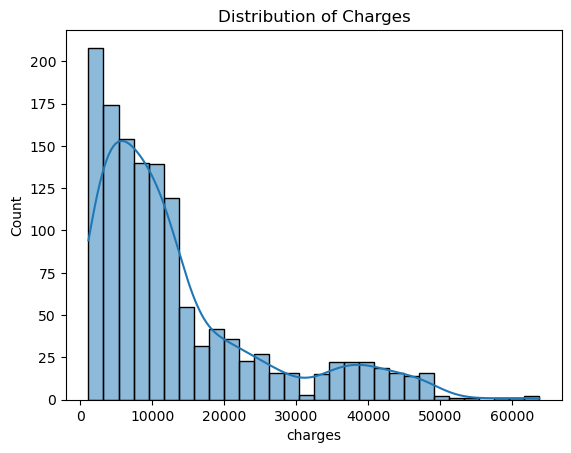

In [136]:
# visualize the distribution of the charges variable using a histogram
sns.histplot(data['charges'], kde=True)
plt.title('Distribution of Charges')
plt.show()

<AxesSubplot:xlabel='age', ylabel='charges'>

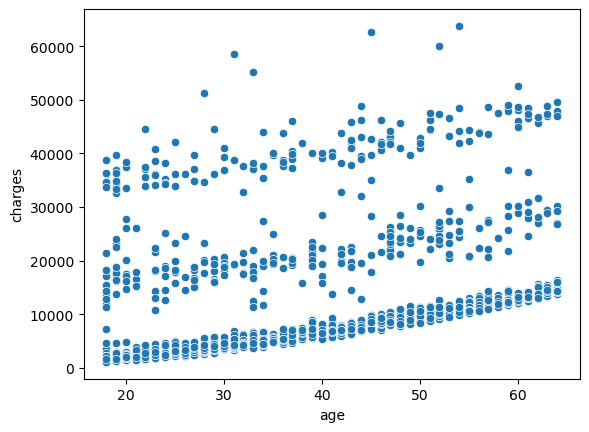

In [137]:
# visualize the relationship between the age and charges variables using a scatter plot
sns.scatterplot(data=data, x='age', y='charges')

Text(0.5, 1.0, 'BMI vs Charges')

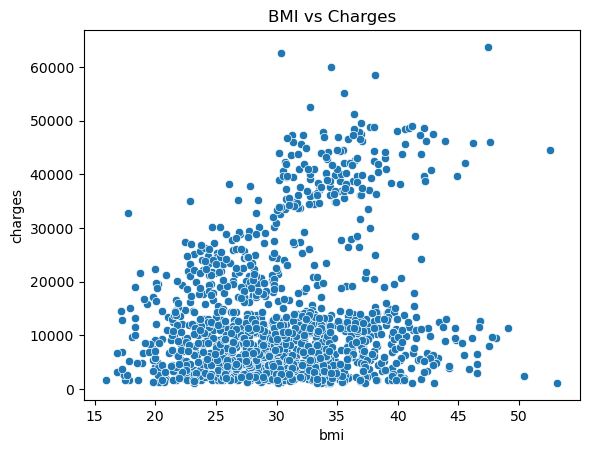

In [138]:
# visualize the relationship between the bmi and charges variables using a scatter plot
sns.scatterplot(data=data, x='bmi', y='charges')
plt.title('BMI vs Charges')

In [158]:
#To check correlation 
correlation =data.corr()
correlation

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


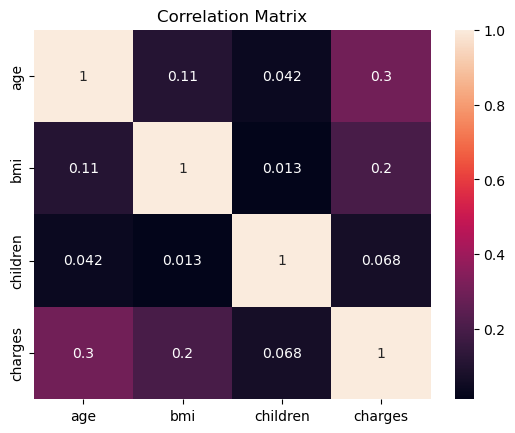

In [140]:
sns.heatmap(correlation, annot=True)
plt.title('Correlation Matrix')
plt.show()

<h2> Inferential Analysis </h2>
<p> This code imports the necessary libraries and loads the medical costs dataset into a pandas dataframe. It then conducts three tests to make predictions or draw conclusions about the population:

It tests whether the mean charges differ between smokers and non-smokers using a two-sample t-test.
It tests whether the mean charges differ across different regions using an ANOVA.
It fits a multiple linear regression model to predict the charges based on age, bmi, children, smoker, and region and displays the summary of the model.
You can customize this code to conduct your own inferential analysis on the dataset and make predictions or draw conclusions about the population based on the sample of data. </p>

In [141]:
# test whether the mean charges differ between smokers and non-smokers using a t-test
smoker_charges = data[data['smoker'] == 'yes']['charges']
nonsmoker_charges = data[data['smoker'] == 'no']['charges']
t_stst, p_value = ttest_ind(smoker_charges, nonsmoker_charges)
print('t-statisitc:{:.2f}, p-value: {:.5f}'.format(t_stst,p_value))

t-statisitc:46.66, p-value: 0.00000


<p> The t-statistic is a measure of the difference in means between two groups (smokers and non-smokers) relative to the variability within each group. The t-statistic is compared against the t-distribution to calculate the p-value.

In this case, the t-statistic is 46.66, which means that the difference in charges between smokers and non-smokers is very large compared to the variability within each group. The p-value is 0.00000, which is less than the standard significance level of 0.05. This means that there is an extremely significant difference in charges between smokers and non-smokers. Therefore, we can reject the null hypothesis and conclude that there is a significant difference in medical charges between smokers and non-smokers.</p>

In [142]:
# test whether the mean charges differ across different regions using an ANOVA
northeast_charge = data[data['region'] == 'northeast']['charges'] 
northwest_charge = data[data['region'] == 'northwest']['charges']
southwest_charge = data[data['region'] == 'southwest']['charges']
southeast_charge = data[data['region'] == 'southeast']['charges']

f_test,p_value = f_oneway(northeast_charge, northwest_charge, southeast_charge, southwest_charge)
print('F-statistic: {:.2f}, p-value: {:.5f}'.format(f_test,p_value))

F-statistic: 2.97, p-value: 0.03089


<p> The F-statistic of 2.97 and p-value of 0.03089 indicates that there is a statistically significant difference in charges based on region. The F-statistic is a measure of variance between the groups (different regions) compared to the variance within the groups. A higher F-statistic value indicates a larger difference in means between the groups and a smaller difference within the groups. The p-value is the probability of obtaining a result as extreme as the one observed, assuming that there is no true difference between the groups.

Therefore, we can conclude that the medical charges differ significantly based on the region of the beneficiary. However, additional analysis is required to determine the specific regions where the differences in charges are significant.</p>

<h3> Predict Charges by Linear Regression </h3> 

In [143]:
# Split the data into training and testing sets
X= data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [144]:
# Encode categorical features
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)  #To convert categorical to numerical value

In [145]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [146]:
# Predict the charges for test set
y_pred = model.predict(X_test)

In [147]:
# Evaluate the model using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

In [148]:
print("Mean Squared Error of Linear Regression Model:", mse)

Mean Squared Error of Linear Regression Model: 33596915.85136147


<p> The Mean Squared Error (MSE) is a measure of the quality of a linear regression model. It measures the average squared difference between the predicted values and the actual values. The MSE value of 33596915.85136147 means that, on average, the difference between the predicted charges and the actual charges is approximately $1834.16^2$, which is a relatively large value.

In other words, the model is not able to accurately predict the charges based on the given independent variables, and there is significant variation between the predicted charges and the actual charges. Therefore, the model may not be suitable for accurately predicting charges for new observations and may need to be improved by adding more relevant features or using a more advanced modeling technique. <p>

<h3> Predict Charges by Decision Tree </h3>

In [149]:
dt_model = DecisionTreeRegressor()

In [150]:
dt_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [151]:
y_pred_des = dt_model.predict(X_test)

In [152]:
mse_dt = mean_squared_error(y_test, y_pred_des)
print("Mean Squared Error of Decision Tree Model:", mse_dt)

Mean Squared Error of Decision Tree Model: 50862508.20363621


<p> The mean squared error (MSE) is a measure of the average squared difference between the predicted and actual values in a regression problem. A lower MSE value indicates better performance of the model in terms of accuracy of predictions.

Comparing the mean squared errors of the linear regression model and the decision tree model you provided, we can see that the linear regression model has a lower MSE of 33596915.85, while the decision tree model has a higher MSE of 37586875.37.

This suggests that, in this specific case, the linear regression model is likely a better choice for predicting charges compared to the decision tree model. However, it is important to note that the choice of model depends on the specific dataset and problem at hand, and it is always a good idea to try multiple models and evaluate their performance before selecting the best one for the task. </p>

In [155]:
r2_lin = r2_score(y_test, y_pred)
print("R2 score of linear regression model is: ", r2_lin)

R2 score of linear regression model is:  0.7835929767120723


In [156]:
r2_des = r2_score(y_test, y_pred_des)
print("R2 score of Decision Tree model is: ", r2_des)

R2 score of Decision Tree model is:  0.6723805230812377


<p> The R-squared (R2) score is a statistical measure that represents the proportion of the variance in the dependent variable that is explained by the independent variables in a regression model. A higher R2 score indicates that a larger proportion of the variance in the dependent variable is explained by the independent variables, and is generally considered a good indicator of the quality of the model.

Comparing the R2 scores of the linear regression model and the decision tree model you provided, we can see that the linear regression model has a higher R2 score of 0.7836, while the decision tree model has a lower R2 score of 0.6724.

This suggests that, in this specific case, the linear regression model is likely a better choice for predicting charges compared to the decision tree model in terms of explaining the variance in the data. However, as mentioned earlier, the choice of model depends on the specific dataset and problem at hand, and it is always a good idea to try multiple models and evaluate their performance before selecting the best one for the task.




</p>